In [2]:
!pip install music21

DEPRECATION: Loading egg at /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/midi-0.2.3-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached jsonpickle-3.0.3-py3-none-any.whl.metadata (7.3 kB)
  Using cached more_itertools-10.2.0-py3-none-any.whl.metadata (34 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.8/22.8 MB 6.7 MB/s eta 0:00:00m eta 0:00:010:01:01m
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)
Using cached jsonpickle-3.0.3-py3-none-any.whl (40 kB)
Using cached more_itertools-10.2.0-py3-none-any.whl (57 kB)


In [3]:
import pandas as pd
import numpy as np
import tensorflow 
import seaborn as sns
import pretty_midi
import matplotlib.pyplot as plt 
import seaborn as sns
import collections
from typing import Optional
from IPython import display
from IPython.display import Audio
from music21 import converter
from typing import Optional
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
import wave
import subprocess
import tempfile
import IPython.display as ipd
from music21 import converter, midi, stream
from pydub import AudioSegment

In [1]:
import os
path ='../data/raw/archive/'
filelist = []

for root, dirs, files in os.walk(path):
    for file in files:
        filelist.append(os.path.join(root, file))

In [6]:
filelist = filelist[4:]

In [7]:
for i in range(25):
    print(filelist[i])

archive/VOF_de_Kunst/Een_kopje_koffie.mid
archive/Eubie_Blake/Charleston_Rag.mid
archive/Eubie_Blake/Chevy_Chase.mid
archive/Wilson,Jackie/I_Get_the_Sweetest_Feeling.mid
archive/Wilson,Jackie/Your_Love_Keeps_Lifting_Me_Higher_Higher.mid
archive/The_Escape_Club/Shake_for_the_Sheik.mid
archive/Morricone_Ennio/Luomo_Dellarmonica.4.mid
archive/Morricone_Ennio/The_Good,_the_Bad_The_Ugly.mid
archive/Morricone_Ennio/Luomo_Dellarmonica.2.mid
archive/Morricone_Ennio/Luomo_Dellarmonica.3.mid
archive/Morricone_Ennio/Luomo_Dellarmonica.1.mid
archive/Morricone_Ennio/Luomo_Dellarmonica.mid
archive/Honey_Cone/Want_Ads.mid
archive/The_Four_Aces/The_Gang_That_Sang_Heart_of_My_Heart.mid
archive/Vaughn/Greensleeves.mid
archive/Vaughn/Petite_Fleur.mid
archive/Vaughn/Isle_of_Capri.mid
archive/Vaughn/Blue_Tango.mid
archive/Cocciante/Io_canto.mid
archive/Cocciante/Margherita.mid
archive/Cocciante/Quando_finisce_un_amore.mid
archive/Cocciante/Se_stiamo_insieme.mid
archive/Cocciante/Celeste_nostalgia.mid
archi

In [8]:
def find_song(name: str, artist: Optional[str] = None):
    '''This function finds the song given the song name and the artist name'''
    name = name.replace(' ', '_')
    x=None
    for file in filelist:
        if file.find(name)>0:
            if artist:
                if file.find(artist)>0:
                    x = filelist.index(file)
            else:
                x = filelist.index(file)
    return x

In [9]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds: int):
    '''This function displays the audio given a pretty midi object and the duration for which the song should play'''
    # Generate a temporary file to write the MIDI data
    with tempfile.NamedTemporaryFile(suffix=".midi") as temp_midi_file:
        # Write the MIDI data to the temporary file
        pm.write(temp_midi_file.name)

        # Convert MIDI to WAV using TiMidity++
        wav_file = temp_midi_file.name.replace(".midi", ".wav")
        subprocess.run(["timidity", "-Ow", "-o", wav_file, temp_midi_file.name], check=True)

        # Read the WAV data
        wav_data, samplerate = read_wav(wav_file)

        # Play the audio using sounddevice
        sd.play(wav_data[:seconds * samplerate], samplerate=samplerate)
        sd.wait()

def read_wav(filename):
    with wave.open(filename, 'rb') as wf:
        nframes = wf.getnframes()
        data = wf.readframes(nframes)
        samplerate = wf.getframerate()
        wav_data = np.frombuffer(data, dtype=np.int16)
    return wav_data, samplerate

In [10]:
def play_song(name: str, artist: Optional[str] = None):
    '''This function plays the song given the song name and the artist name'''
    name = name.replace(' ', '_')
    if artist:
        artist = artist.replace(' ', '_')
    try:
        index = find_song(name, artist)
    except Exception as e:
        print("An error occurred while finding the song:", e)
        return None
    
    try:
        file = filelist[index]
        print(f"Processing file: {file}")
        print(f"Index: {index}, Filelist length: {len(filelist)}")
    except IndexError:
        print("Song index is out of range.")
        
        return None
    except Exception as e:
        print("An unexpected error occurred while retrieving the file:", e)
        return None
    
    try:
        midiFile = pretty_midi.PrettyMIDI(file)
        print(midiFile)
        return display_audio(midiFile, 10)
    except Exception as e:
        print("An error occurred while processing the MIDI file:", e)
        return None

In [11]:
def list_artist(name: str):
    '''This function displays the songs that are present under the artist name'''
    name = name.replace(' ', '_')
    path = "../data/raw/archive/"
    try:
        dir_list = os.listdir(path+name)
        print(dir_list)
    except:
        print("Artist not found")

In [12]:
list_artist("AC DC")

['Back_In_Black.mid', 'Dirty_Deeds_Done_Dirt_Cheap.mid', 'You_Shook_Me_All_Night_Long.mid', 'Who_Made_Who.mid', 'Thunderstruck.1.mid', 'Back_In_Black.1.mid', 'Highway_To_Hell.1.mid', 'Highway_To_Hell.2.mid', 'R.I.P._Rock_in_Peace_.mid', 'Whole_Lotta_Rosie.mid', 'TNT.mid', 'Highway_To_Hell.mid', 'For_Those_About_To_Rock_We_Salute_You_.mid', 'You_Shook_Me_All_Night_Long.1.mid', 'Thunderstruck.mid', 'TNT.1.mid']


In [14]:
file = filelist[find_song("Thunderstruck")]
midiFile = pretty_midi.PrettyMIDI(file)

In [15]:
print('Number of instruments:', len(midiFile.instruments))
for instrument in midiFile.instruments:
    instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
    print(instrument_name)

Number of instruments: 5
Celesta
Overdriven Guitar
Honky-tonk Piano
Electric Bass (finger)
Overdriven Guitar


In [16]:
instrument = midiFile.instruments[1]

In [17]:
for i, note in enumerate(instrument.notes[:10]):
    note_name = pretty_midi.note_number_to_name(note.pitch)
    duration = note.end - note.start
    print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=59, note_name=B3, duration=0.1082
1: pitch=63, note_name=D#4, duration=0.1063
2: pitch=59, note_name=B3, duration=0.1082
3: pitch=66, note_name=F#4, duration=0.1063
4: pitch=59, note_name=B3, duration=0.1063
5: pitch=63, note_name=D#4, duration=0.1082
6: pitch=59, note_name=B3, duration=0.1082
7: pitch=66, note_name=F#4, duration=0.1026
8: pitch=59, note_name=B3, duration=0.1082
9: pitch=63, note_name=D#4, duration=0.1082


In [18]:
def midi_to_notes(midi_file: str, instrument: midiFile.instruments) -> pd.DataFrame:
    '''This function converts the MIDI file into notes and extraxts the pitch, start, end, step, and duration of each note'''
    pm = pretty_midi.PrettyMIDI(midi_file)
    notes = collections.defaultdict(list)

    # Sort the notes by start time
    sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
    prev_start = sorted_notes[0].start

    for note in sorted_notes:
        start = note.start
        end = note.end
        notes['pitch'].append(note.pitch)
        notes['start'].append(start)
        notes['end'].append(end)
        notes['step'].append(start - prev_start)
        notes['duration'].append(end - start)
        notes['instrument'].append(pretty_midi.program_to_instrument_name(instrument.program))
        prev_start = start

    return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [19]:
notes = midi_to_notes(file,instrument)
notes

,pitch,start,end,step,duration,instrument
0,59,2.126865,2.235074,0.000000,0.108209,Overdriven Guitar
1,63,2.240671,2.347014,0.113806,0.106343,Overdriven Guitar
2,59,2.350745,2.458954,0.110075,0.108209,Overdriven Guitar
3,66,2.464551,2.570894,0.113806,0.106343,Overdriven Guitar
4,59,2.574626,2.680969,0.110075,0.106343,Overdriven Guitar
...,...,...,...,...,...,...
2405,59,289.996801,290.169420,0.178571,0.172619,Overdriven Guitar
2406,64,290.175372,290.356622,0.178572,0.181250,Overdriven Guitar
2407,59,290.362872,290.544122,0.187500,0.181250,Overdriven Guitar
2408,63,290.550372,290.731622,0.187500,0.181250,Overdriven Guitar


In [20]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
    '''This function plots the piano roll of the notes given the note and the count of the note'''
    if count:
        title = f'First {count} notes'
    else:
        title = f'Whole track'
        count = len(notes['pitch'])
    plt.figure(figsize=(20, 4))
    plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
    plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
    plt.plot(
        plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
    plt.xlabel('Time [s]')
    plt.ylabel('Pitch')
    _ = plt.title(title)

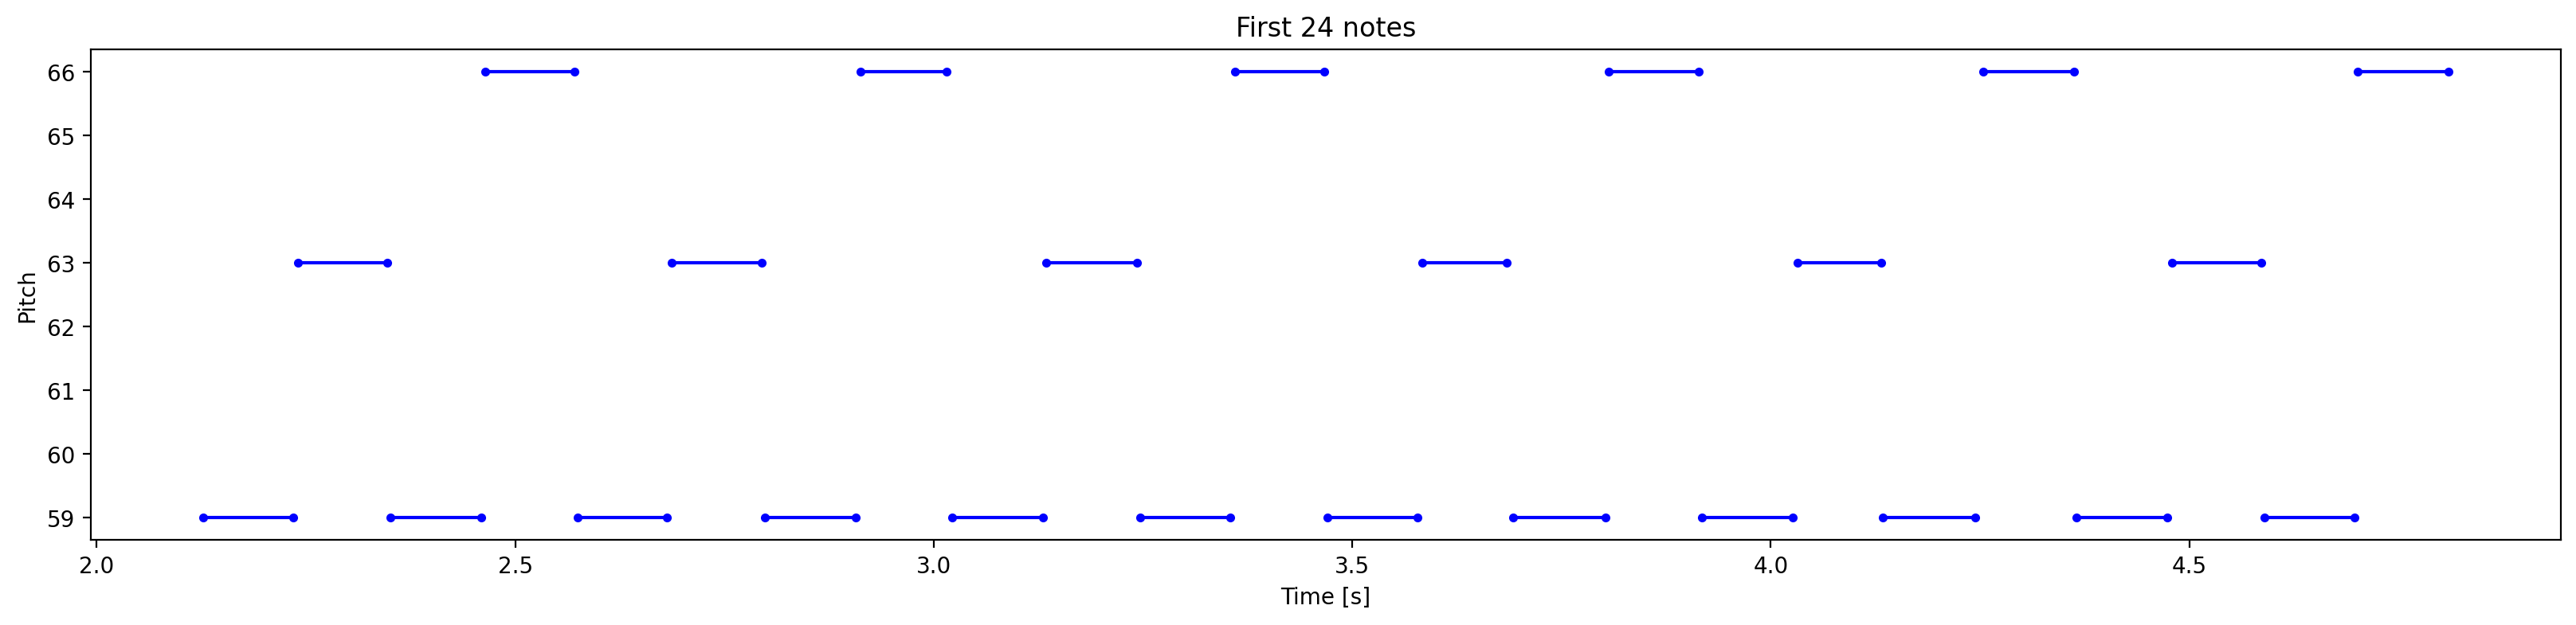

In [21]:
plot_piano_roll(notes, count=24)

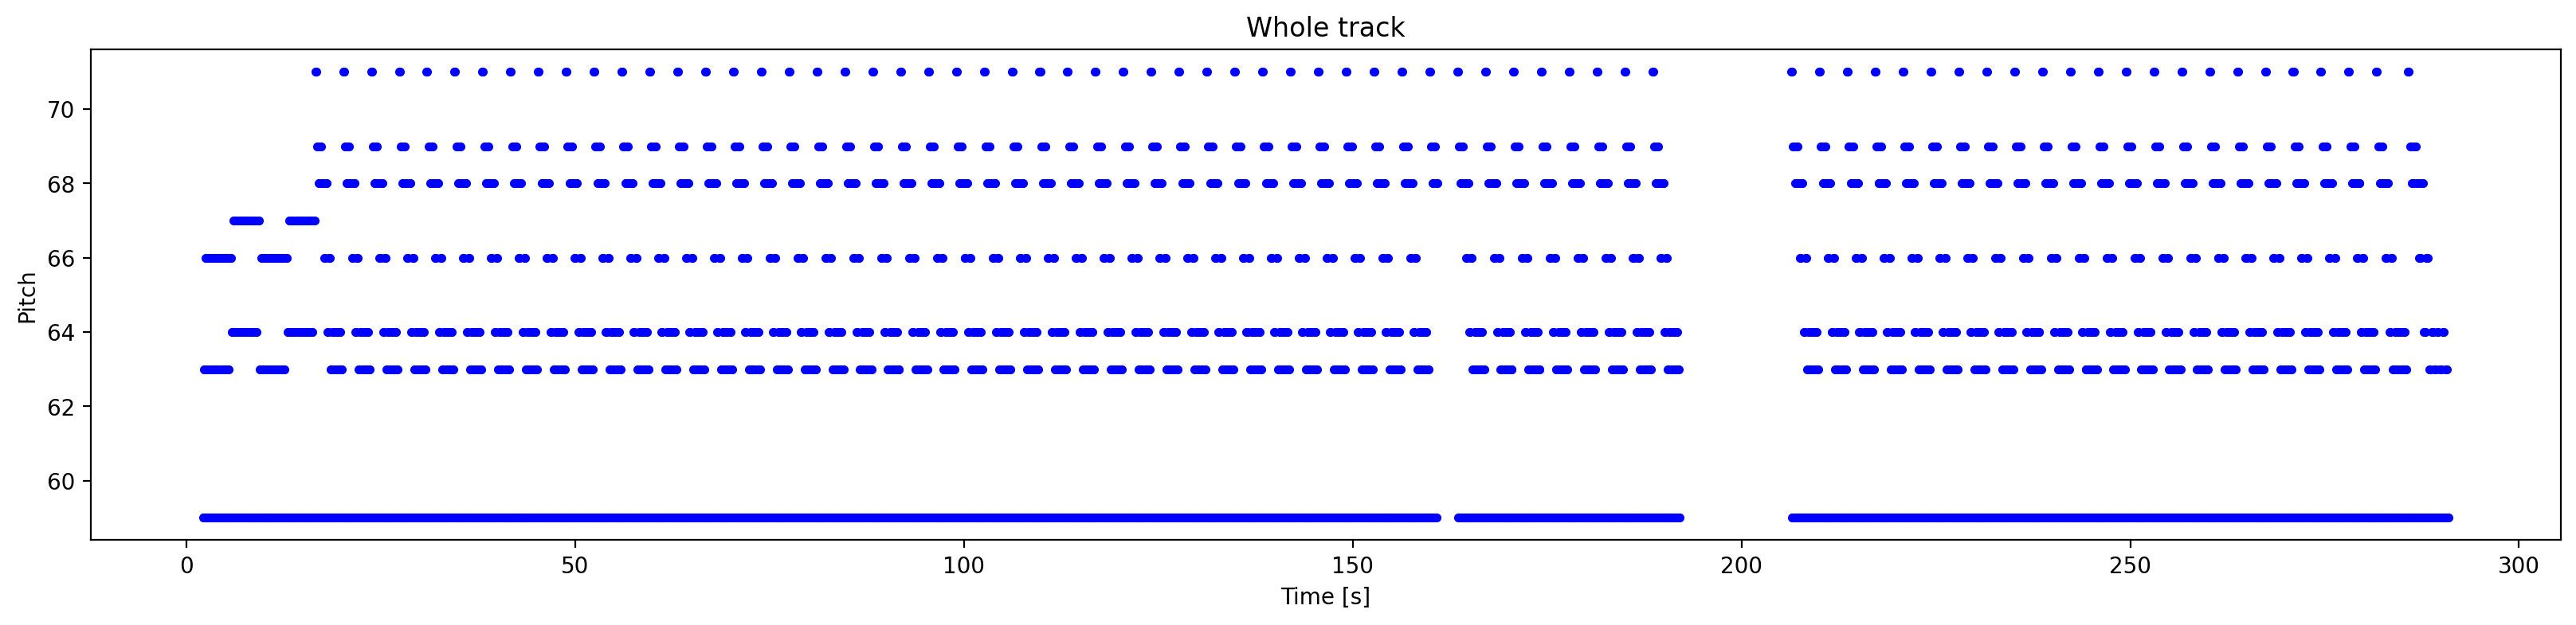

In [22]:
plot_piano_roll(notes)

In [23]:
def instrument_to_num(df: pd.Series()):
    '''This function converts the instruments in a numerical format'''
    df = df.map({"Acoustic Grand Piano":0,
"Bright Acoustic Piano":1,
"Electric Grand Piano":2,
"Honky-tonk Piano":3,
"Electric Piano 1":4,
"Electric Piano 2":5,
"Harpsichord":6,
"Clavinet":7,

"Celesta":8,
'Glockenspiel':9,
"Music Box":10,
'Vibraphone':11,
'Marimba':12,
'Xylophone':13,
'Tubular Bells':14,
'Dulcimer':15,

'Drawbar Organ':16,
'Percussive Organ':17,
'Rock Organ':18,
'Church Organ':19,
'Reed Organ':20,
'Accordion':21,
'Harmonica':22,
'Tango Accordion':23,

'Acoustic Guitar (nylon)':24,
'Acoustic Guitar (steel)':25,
'Electric Guitar (jazz)':26,
'Electric Guitar (clean)':27,
'Electric Guitar (muted)':28,
'Overdriven Guitar':29,
'Distortion Guitar':30,
'Guitar Harmonics':31,

'Acoustic Bass':32,
'Electric Bass (finger)':33,
'Electric Bass (pick)':34,
'Fretless Bass':35,
'Slap Bass 1':36,
'Slap Bass 2':37,
'Synth Bass 1':38,
'Synth Bass 2':39,

'Violin':40,
'Viola':41,
'Cello':42,
'Contrabass':43,
'Tremolo Strings':44,
'Pizzicato Strings':45,
'Orchestral Harp':46,
'Timpani':47,

'String Ensemble 1':48,
'String Ensemble 2':49,
'Synth Strings 1':50,
'Synth Strings 2':51,
'Choir Aahs':52,
'Voice Oohs':53,
'Synth Choir':54,
'Orchestra Hit':55,

'Trumpet':56,
'Trombone':57,
'Tuba':58,
'Muted Trumpet':59,
'French Horn':60,
'Brass Section':61,
'Synth Brass 1':62,
'Synth Brass 2':63,

'Soprano Sax':64,
'Alto Sax':65,
'Tenor Sax':66,
'Baritone Sax':67,
'Oboe':68,
'English Horn':69,
'Bassoon':70,
'Clarinet':71,

'Piccolo':72,
'Flute':73,
'Recorder':74,
'Pan Flute':75,
'Blown bottle':76,
'Shakuhachi':77,
'Whistle':78,
'Ocarina':79,

'Lead 1 (square)':80,
'Lead 2 (sawtooth)':81,
'Lead 3 (calliope)':82,
'Lead 4 chiff':83,
'Lead 5 (charang)':84,
'Lead 6 (voice)':85,
'Lead 7 (fifths)':86,
'Lead 8 (bass + lead)':87,

'Pad 1 (new age)':88,
'Pad 2 (warm)':89,
'Pad 3 (polysynth)':90,
'Pad 4 (choir)':91,
'Pad 5 (bowed)':92,
'Pad 6 (metallic)':93,
'Pad 7 (halo)':94,
'Pad 8 (sweep)':95,

'FX 1 (rain)':96,
'FX 2 (soundtrack)':97,
'FX 3 (crystal)':98,
'FX 4 (atmosphere)':99,
'FX 5 (brightness)':100,
'FX 6 (goblins)':101,
'FX 7 (echoes)':102,
'FX 8 (sci-fi)':103,

'Sitar':104,
'Banjo':105,
'Shamisen':106,
'Koto':107,
'Kalimba':108,
'Bagpipe':109,
'Fiddle':110,
'Shanai':111,

'Tinkle Bell':112,
'Agogo':113,
'Steel Drums':114,
'Woodblock':115,
'Taiko Drum':116,
'Melodic Tom':117,
'Synth Drum':118,

'Reverse Cymbal':119,
'Guitar Fret Noise':120,
'Breath Noise':121,
'Seashore':122,
'Bird Tweet':123,
'Telephone Ring':124,
'Helicopter':125,
'Applause':126,
'Gunshot':127})
    return df

In [24]:
df = pd.DataFrame()
for instrument in midiFile.instruments:
    notes = midi_to_notes(file,instrument)
    df = pd.concat([df, notes], ignore_index=True)

In [25]:
df.instrument = instrument_to_num(df.instrument)
df

,pitch,start,end,step,duration,instrument
0,42,0.458955,0.899253,0.000000,0.440298,8
1,42,0.895522,0.899253,0.436567,0.003731,8
2,42,1.343283,1.787313,0.447761,0.444030,8
3,42,1.791044,2.235074,0.447761,0.444030,8
4,42,2.240671,2.460820,0.449627,0.220149,8
...,...,...,...,...,...,...
6340,59,281.645486,285.684253,0.000000,4.038767,29
6341,54,285.691465,290.925372,4.045979,5.233907,29
6342,59,285.691465,290.925372,0.000000,5.233907,29
6343,59,290.934747,291.294122,5.243282,0.359375,29


In [26]:
output = pd.DataFrame({'pitch': df['pitch'], 'start': df['start'], 'end': df['end'], 'step': df['step'], 'duration': df['duration'], 'instrument': df['instrument']})
output.to_csv('SampleSong.csv', index=False)

In [27]:
indexes = []
for i in range(17233):
    indexes.append(i)
import random
random.seed(10)
random.shuffle(indexes)

In [28]:
def convert_data(num: int):
    num = num*1000
    df = pd.DataFrame()
    for i in range(num-1000,17233):
        print(i, end=" ")
        if((i+1)%25==0):
            print("")
        file = filelist[i]
        try:
            midiFile = pretty_midi.PrettyMIDI(file)
            for instrument in midiFile.instruments:
                notes = midi_to_notes(file,instrument)
                df = pd.concat([df, notes], ignore_index=True)
        except:
            pass
    df.instrument = instrument_to_num(df.instrument)
    output = pd.DataFrame({'pitch': df['pitch'], 'start': df['start'], 'end': df['end'], 'step': df['step'], 'duration': df['duration'], 'instrument': df['instrument']})
    output.to_csv('Fulldf-'+str(int(num/1000))+'.csv', index=False)
    print("Done")

In [30]:
import dask.dataframe as dd
from matplotlib import rcParams

In [31]:
randdf = dd.read_csv('SampleSong.csv')

In [32]:
randdf = randdf.dropna()

In [33]:
randdf = randdf[randdf.start < 3000]
randdf = randdf[randdf.end < 3000]
randdf = randdf[randdf.step < 300]
randdf = randdf[randdf.duration < 150]

In [34]:
randdf = randdf.head(100000)
randdf

,pitch,start,end,step,duration,instrument
0,42,0.458955,0.899253,0.000000,0.440298,8
1,42,0.895522,0.899253,0.436567,0.003731,8
2,42,1.343283,1.787313,0.447761,0.444030,8
3,42,1.791044,2.235074,0.447761,0.444030,8
4,42,2.240671,2.460820,0.449627,0.220149,8
...,...,...,...,...,...,...
6340,59,281.645486,285.684253,0.000000,4.038767,29
6341,54,285.691465,290.925372,4.045979,5.233907,29
6342,59,285.691465,290.925372,0.000000,5.233907,29
6343,59,290.934747,291.294122,5.243282,0.359375,29


In [35]:
randdf.dtypes

pitch           int64
start         float64
end           float64
step          float64
duration      float64
instrument      int64
dtype: object

In [36]:
randdf.head(10)

,pitch,start,end,step,duration,instrument
0,42,0.458955,0.899253,0.000000,0.440298,8
1,42,0.895522,0.899253,0.436567,0.003731,8
2,42,1.343283,1.787313,0.447761,0.444030,8
3,42,1.791044,2.235074,0.447761,0.444030,8
4,42,2.240671,2.460820,0.449627,0.220149,8
5,42,2.464551,2.682835,0.223880,0.218283,8
6,42,2.688432,2.906715,0.223880,0.218283,8
7,42,2.912312,3.130596,0.223880,0.218283,8
8,42,3.134327,3.354476,0.222015,0.220149,8
9,42,3.360073,3.578357,0.225746,0.218283,8


In [39]:
rcParams['figure.figsize'] = 4,4

Text(0, 0.5, 'Number of Notes')

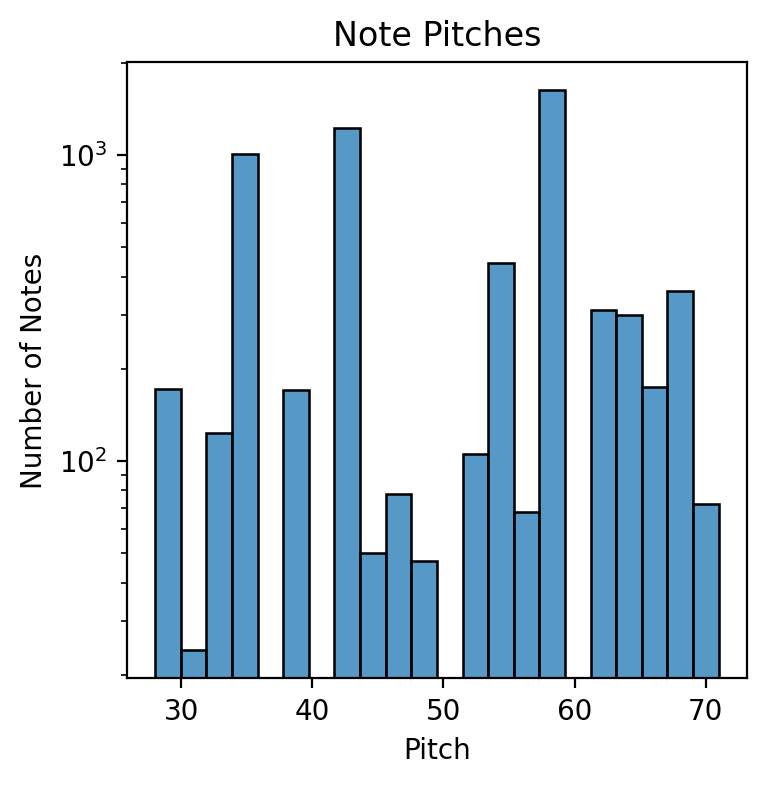

In [40]:
sns.histplot(x='pitch', data=randdf,binwidth=2)
plt.yscale('log')
plt.title('Note Pitches')
plt.xlabel('Pitch')
plt.ylabel('Number of Notes')

Text(0, 0.5, 'Number of Notes')

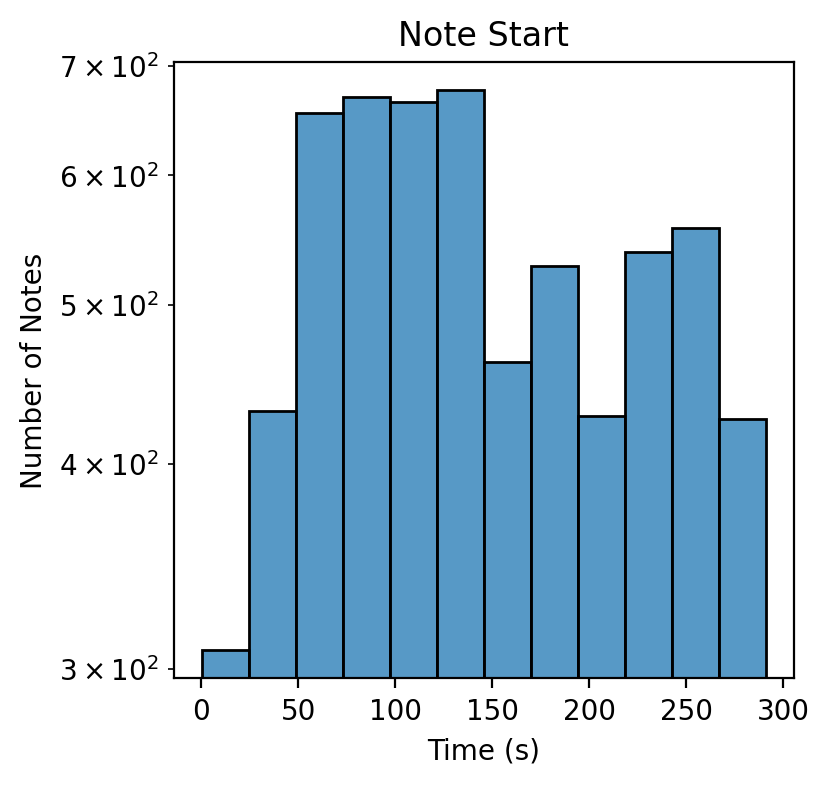

In [41]:
sns.histplot(x='start', data=randdf,binwidth=25)
plt.yscale('log')
plt.title('Note Start')
plt.xlabel('Time (s)')
plt.ylabel('Number of Notes')

Text(0, 0.5, 'Number of Notes')

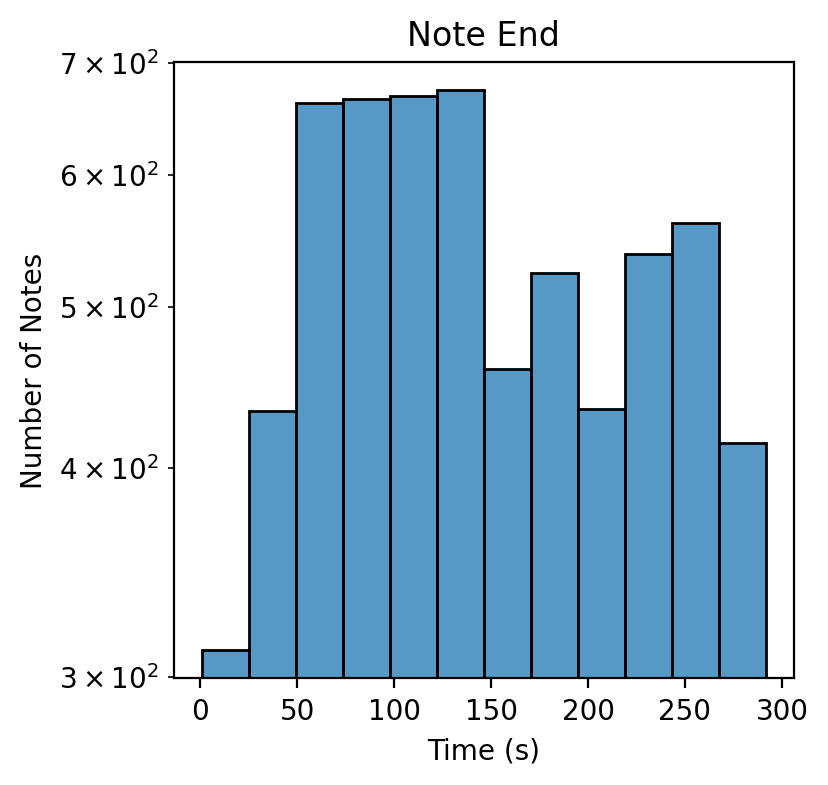

In [42]:
sns.histplot(x='end', data=randdf,binwidth=25)
plt.yscale('log')
plt.title('Note End')
plt.xlabel('Time (s)')
plt.ylabel('Number of Notes')

Text(0, 0.5, 'Number of Notes')

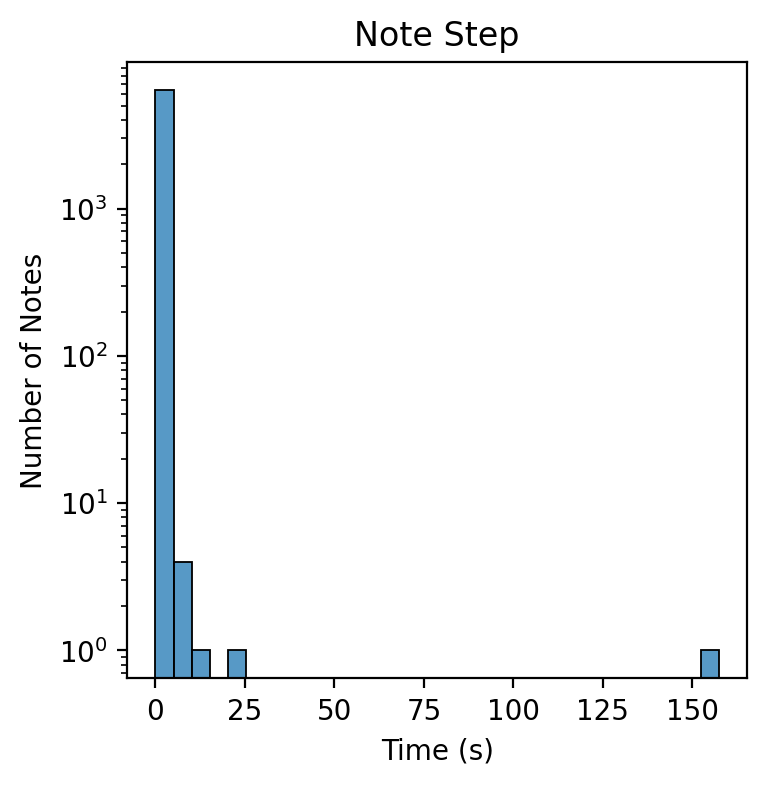

In [43]:
sns.histplot(x='step', data=randdf,binwidth=5)
plt.yscale('log')
plt.title('Note Step')
plt.xlabel('Time (s)')
plt.ylabel('Number of Notes')

Text(0, 0.5, 'Number of Notes')

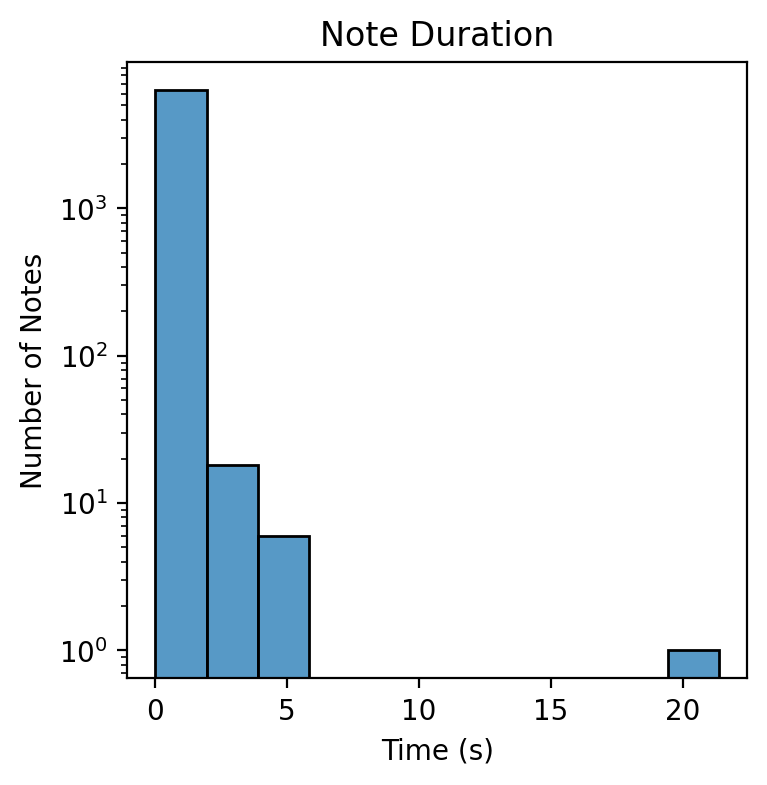

In [44]:
sns.histplot(x='duration', data=randdf,binwidth=2)
plt.yscale('log')
plt.title('Note Duration')
plt.xlabel('Time (s)')
plt.ylabel('Number of Notes')

Text(0, 0.5, 'Number of Notes')

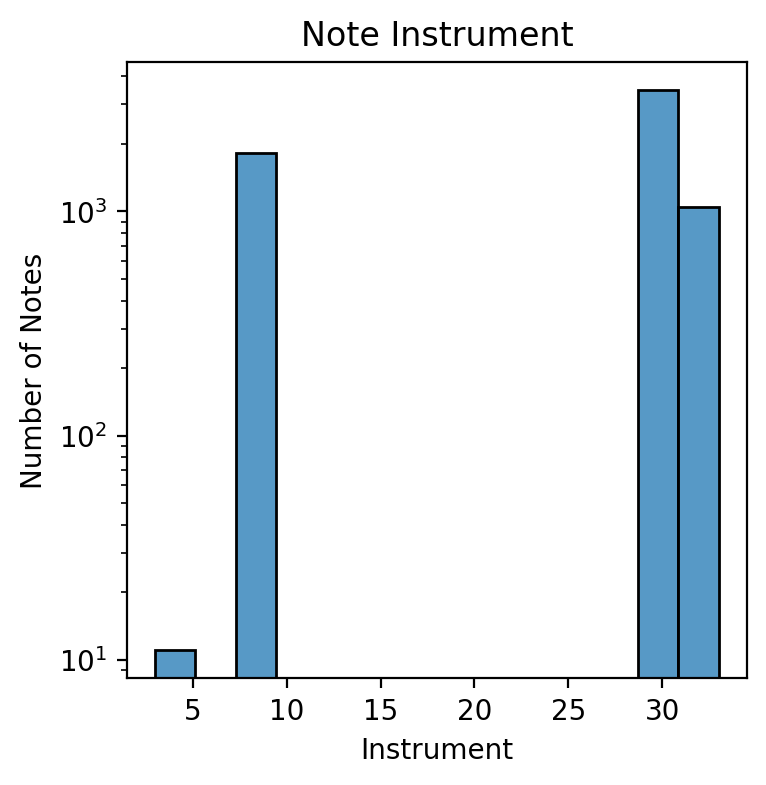

In [45]:
sns.histplot(x='instrument', data=randdf)
plt.yscale('log')
plt.title('Note Instrument')
plt.xlabel('Instrument')
plt.ylabel('Number of Notes')